## CMU Final Project

### Jingchen Liang

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
#import math

### Gradient Descent - Finding the Minimum (Unconstrained)

__Example 1. x^2 + 4*x + 4__

__Example 2: Beale Function has minimum at (3, 0.5)__

In [44]:
f1 = lambda x : x[0]**2 + 4*x[0] + 4
beale = lambda x : (1.5-x[0]+x[0]*x[1])**2 + (2.25-x[0]+x[0]*(x[1]**2))**2 + (2.625-x[0]+x[0]*(x[1]**3))**2

In [45]:
# find the gradient
def grad(fun, x, eps=1e-7):
    dim = x.shape[0]
    gradient = np.zeros(dim)
    delta = np.eye(dim)
    for i in range(dim):
        gradient[i] = (fun(x+eps * delta[i]) - fun(x))/eps
    return gradient

In [46]:
# gradient descent algorithm
def gradient_descent(fun,x0,epsilon,k,alpha):
    x_n = x0
    x_new = np.array([])
    prediction = -10

    while abs(fun(x_n) - prediction) > epsilon:
        prediction = fun(x_n)
        x_new = np.append(x_new, x_n)
        x_n = x_n - alpha*grad(fun,x_n)
        k = k+1
    
    return x_n, k, x_new

__Exmaple 1__ For the f1 function, we set the starting point is 10

In [47]:
start_time = time.time()

x0 = np.array([10])
results = gradient_descent(f1,x0,1e-7,0,0.0005)

print("Function Value: ", f1(results[0]), "at x = ", results[0], "in", results[1], "iterations")

print("Execution time: %s seconds" % (time.time() - start_time))

Function Value:  4.989250300013737e-05 at x =  [-1.99293654] in 7434 iterations
Execution time: 0.15836501121520996 seconds


The optimal point is near -2, and about 7400 iterations were performed in 1.4 seconds. If we define the learning rate alpha = 0.00005, we have:

In [48]:
start_time = time.time()

x0 = np.array([10])
results = gradient_descent(f1,x0,1e-7,0,0.00005)

print("Function Value: ", f1(results[0]), "at x = ", results[0], "in", results[1], "iterations")

print("Execution time: %s seconds" % (time.time() - start_time))

Function Value:  0.0004998413896064591 at x =  [-1.97764287] in 62852 iterations
Execution time: 1.7342917919158936 seconds


__Example 2__ For the beale function, we set the starting point is [4,0]

In [6]:
start_time = time.time()

x0 = np.array([4,0])
results = gradient_descent(beale,x0,1e-7,0,0.0005)

print("Function Value: ", beale(results[0]), "at x = ", results[0], "in", results[1], "iterations")

print("Execution time: %s seconds" % (time.time() - start_time))

Function Value:  0.00036792353469975976 at x =  [3.0492535  0.51203347] in 28252 iterations
Execution time: 1.248945951461792 seconds


The optimal point is near [3, 0.5], and about 28000 iterations were performed in 1.4 seconds. If we define the learning rate alpha = 0.00005, we have:

In [7]:
start_time = time.time()

x0 = np.array([4,0])
results = gradient_descent(beale,x0,1e-7,0,0.00005)

print("Function Value: ", beale(results[0]), "at x = ", results[0], "in", results[1], "iterations")

print("Execution time: %s seconds" % (time.time() - start_time))

Function Value:  0.004971965227686887 at x =  [3.1956725  0.54491271] in 174899 iterations
Execution time: 24.51436185836792 seconds


Althoguh more iterations were performed, the accuracy is lower than the previous one. We need to add a backtracking line search to define alpha.

In [50]:
def Back_Armijo(fun,x):                 
    alpha = 1                    
    beta = 0.8
    while fun(x - alpha*grad(fun,x)) >= (fun(x) - beta*alpha*(grad(fun,x).T@grad(fun,x))):
        alpha *= beta
    return alpha

In [51]:
# the new gradient descent algorithm
def gradient_descent(fun,x0,epsilon):
    x_n = x0
    x_new = np.array([])
    prediction = -10
    k = 0

    while abs(fun(x_n) - prediction) > epsilon:
        prediction = fun(x_n)
        x_new = np.append(x_new, x_n)
        alpha = Back_Armijo(fun,x_n)
        x_n = x_n - alpha*grad(fun,x_n)
        k = k+1
    
    return x_n, k, x_new

In [52]:
start_time = time.time()

x0 = np.array([4,0])
results = gradient_descent(beale,x0,1e-7)

print("Function Value: ", beale(results[0]), "at x = ", results[0], "in", results[1], "iterations")

print("Execution time: %s seconds" % (time.time() - start_time))

Function Value:  4.5759936032060675e-06 at x =  [3.00535374 0.50129886] in 219 iterations
Execution time: 0.28815317153930664 seconds


Now, less than 300 steps were performed, which is faster！

We also redo f1, and only 27 steps are necessary to operate.

In [54]:
start_time = time.time()

x0 = np.array([10])
results = gradient_descent(f1,x0,1e-7)

print("Function Value: ", f1(results[0]), "at x = ", results[0], "in", results[1], "iterations")

print("Execution time: %s seconds" % (time.time() - start_time))

Function Value:  3.7265332597513634e-08 at x =  [-1.99980696] in 27 iterations
Execution time: 0.011459827423095703 seconds


### Linear Regression

#### Method 1 Direct solution - pseudo inverse

Pseudo inverse of the features matrix x multiplied with y gives the solution to this mean squared minimization or regression problem directly. This can be expressed as :
$$
   Y= XA 
$$

$$
A = (X^T X)^{-1}X^T Y
$$

where $X$ is the features set with a column of 1's appended for the bias value computation 

We can compare the gradient descent parameter values with direct solutions

In [11]:
def generalized_inverse(x,y):
    return np.linalg.inv(x.T @ x) @ x.T @ y

#### Method 2 Direct solution - gradient descent

We can also use similar gradient descent algorithm that we just created. Here, we neeed to input x, y, and we focus on finding the parameter θ values.

$$
y = θ^Tx + ε
$$
or in other words minimize the loss function
$$
H(θ) = \frac{1}{2n}\sum_{i=1}^n(θ^Tx_i - y_i)^2 
$$

In [24]:
# define the cost function for the linear regression
linear_cost = lambda x,y,theta : np.sum((x @ theta - y)**2)/ (2 * len(x))

In [296]:
def linear_grad(fun, x, y, theta, eps=1e-7):
    dim = theta.shape[0]
    gradient = np.zeros(dim)
    delta = np.eye(dim)
    for i in range(dim):
        gradient[i] = (fun(x,y,(theta+eps*delta[i])) - fun(x, y, theta))/eps
    return gradient

# Another way to calculate the gradient is to take partial derivative of linear_cost. We use the similar process in part 1

In [26]:
def linear_Back_Armijo(fun,x, y, theta):                 
    alpha = 1                    
    beta = 0.8
    while fun(x,y,theta - alpha*linear_grad(fun,x,y,theta)) >= (fun(x,y,theta) - beta*alpha*((linear_grad(fun,x,y,theta).T @ linear_grad(fun,x,y,theta)))):
        alpha *= beta
    return alpha

In [27]:
def linear_gradient_descent(fun,x,y,theta0,epsilon):
    theta_n = theta0
    theta_new = np.array([])
    prediction = -10
    k = 0

    while abs(fun(x,y,theta_n) - prediction) > epsilon:
        prediction = fun(x,y,theta_n)
        theta_new = np.append(theta_new, theta_n)
        alpha = linear_Back_Armijo(fun,x, y, theta_n)
        theta_n = theta_n - alpha*linear_grad(fun,x,y,theta_n)
        k = k+1
    
    return theta_n, k, theta_new

__Question 1: How does the gradient descent accuracy compare with the standard method?__

We will try 4 different functions to check our algorithm, and we comapre the parameter results with values from generalized_inverse function.

Ex1: linear and univariate 

Ex2: linear and multivariate 

Ex3: nonlinear and univariate 

Ex4: nonlinear and multivariate 

For each example, we create the data (x and y values), we we estimate the theta values. In addition, we add a random noise from different PDFs.

Each time we may have different $ x_i $ and $ y_i $. We may use np.random.seed() to make the results reproducible.

__Example 1:__ Linear and univariate - simple linear regression

$$
y_i = θ_0x_0 + θ_1x_1 =  θ_0 + θ_1x_1 + UniformNoise \;\;\;\;\;\;  given \;\;\ x_0 = 1
$$

In [28]:
def CreateData1(numObs, low, high, mean, sd, df):
    """
    numObs: number of observations that we want to create
    low, high: low and high boundaries of uniform distribution 
    mean, variance: mean and variance of the normal distribution 
    """
    x = np.zeros((numObs, 2))
    y_uni = np.zeros(numObs)
    y_nor = np.zeros(numObs)
    y_t = np.zeros(numObs)
    
    for i in range(numObs):
        x[i][0] = 1   # since x0 is 1 defined by hypothesis
        x[i][1] = i
        y_uni[i] = i + np.random.uniform(low, high)
        y_nor[i] = i + np.random.normal(mean, sd)
        y_t[i] = i + np.random.standard_t(df)
    return x, y_uni, y_nor, y_t

This function creates many y columns according to different PDFs. Here, we use uniform distribution noise.

In [31]:
np.random.seed(90)
x1, y1_uni, y1_nor, y1_t = CreateData1(500,-30,30,0,10,2)

In [32]:
# we can first see the generalized inverse solution
generalized_inverse(x1, y1_uni)

array([-1.97677002,  1.00298679])

In [483]:
# calculate the min H(θ) for generalized inverse solution
linear_cost(x1, y1_uni,generalized_inverse(x1, y1_uni))

135.9519177669585

In [33]:
start_time = time.time()

theta0 = np.array([3,3]) # starting point

Ex1_results = linear_gradient_descent(linear_cost,x1,y1_uni,theta0,1e-7)

print("Linear cost function minimum: ", linear_cost(x1,y1_uni,Ex1_results[0]), ", when θ = ", Ex1_results[0], "in", Ex1_results[1], "iterations")
print("Execution time: %s seconds" % (time.time() - start_time))

Linear cost function minimum:  135.96871480640007 , when θ =  [-1.61074562  1.00188825] in 52883 iterations
Execution time: 489.30465388298035 seconds


In [34]:
# about 490 seconds

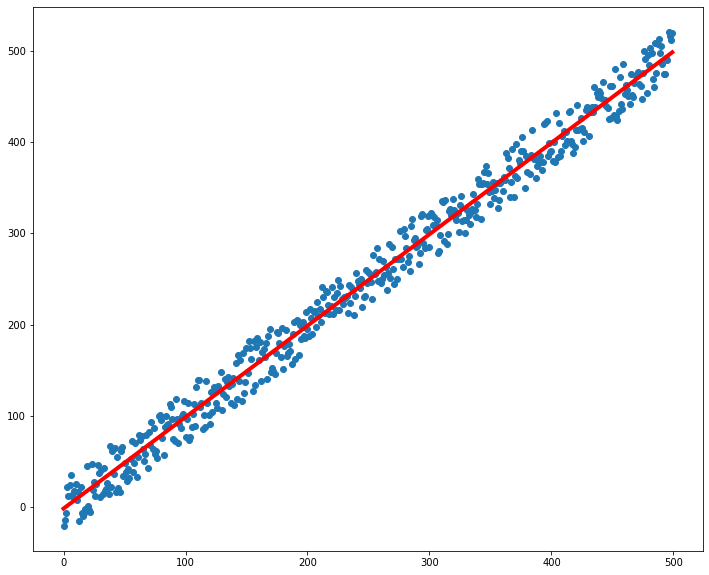

In [35]:
# We can also plot the regression line
reg_line = Ex1_results[0][0]*x1[:,0] + Ex1_results[0][1]*x1[:,1]
plt.plot(x1[:,1],y1_uni,'o')
plt.plot(reg_line, linewidth = 4, color = 'red')
fig = plt.gcf()
fig.set_size_inches(12, 10)

__Example 2:__ Linear and multivariate

We add a new varaible x2:

$$
y = θ_0x_0 + θ_1x_1 + θ_2x_2=  θ_0 + θ_1x_1 + θ_2x_2 + NormalNoise
$$


In [36]:
# create a dataset
def CreateData2(numObs, interval, low, high, mean, sd, df):
    x = np.zeros((numObs, 3))
    y_uni = np.zeros(numObs)
    y_nor = np.zeros(numObs)
    y_t = np.zeros(numObs)
    
    for i in range(numObs):
        x[i][0] = 1   
        x[i][1] = i
        x[i][2] = np.random.choice(interval)        
        y_uni[i] = i + np.random.choice(interval) + np.random.uniform(low, high)
        y_nor[i] = i + np.random.choice(interval) + np.random.normal(mean,sd)
        y_t[i] = i + np.random.choice(interval) + np.random.standard_t(df)
    return x, y_uni, y_nor, y_t

Here, we use normal distribution noise.

In [39]:
np.random.seed(90)
x2, y2_uni, y2_nor, y2_t = CreateData2(500,10,-30,30,0,10,3)

In [40]:
generalized_inverse(x2, y2_nor)

array([6.47741651, 0.9938915 , 0.06160634])

In [484]:
linear_cost(x2,y2_nor,generalized_inverse(x2, y2_nor))

50.668833753757426

In [41]:
start_time = time.time()

theta0 = np.array([2,2,2]) # starting point

Ex2_results = linear_gradient_descent(linear_cost,x2,y2_nor,theta0,1e-7)

print("Linear cost function minimum: ", linear_cost(x2,y2_nor,Ex2_results[0]), ", when θ = ", Ex2_results[0], "in", Ex2_results[1], "iterations")
print("Execution time: %s seconds" % (time.time() - start_time))

Linear cost function minimum:  50.69562572030049 , when θ =  [5.89294861 0.99503994 0.11256769] in 64747 iterations
Execution time: 843.9593300819397 seconds


In [46]:
# about 840 seconds

__Example 3:__ Nonlinear and univariate

$$
y = θ_0 + θ_1x_1 + θ_2x_1^2 + NormalNoise
$$

We still have one independent variable x1 here, but one is squared. However, this model is still linear in the parameters.

In [58]:
# create a dataset
def CreateData3(numObs, low, high, mean, sd, df):
    x = np.zeros((numObs, 3))
    y_uni = np.zeros(numObs)
    y_nor = np.zeros(numObs)
    y_t = np.zeros(numObs)
    
    for i in range(numObs):
        x[i][0] = 1   
        x[i][1] = i/40
        x[i][2] = np.square(i/40)        
        y_uni[i] = i/40 + np.square(i/40) + np.random.uniform(low, high)
        y_nor[i] = i/40 + np.square(i/40) + np.random.normal(mean,sd)
        y_t[i] = i/40 + np.square(i/40) + np.random.standard_t(df)
    return x, y_uni, y_nor, y_t

Here, we use normal distribution noise.

In [94]:
np.random.seed(90)
x3, y3_uni, y3_nor, y3_t = CreateData3(500,-30,30,0,10,2)

In [95]:
generalized_inverse(x3, y3_nor)

array([1.13369471, 0.7829617 , 1.01371879])

In [485]:
linear_cost(x3,y3_nor,generalized_inverse(x3, y3_nor))

56.29866641997017

In [63]:
start_time = time.time()

theta0 = np.array([7,7,7])

Ex3_results = linear_gradient_descent(linear_cost,x3,y3_nor,theta0,1e-7)

print("Linear cost function minimum: ", linear_cost(x3,y3_nor,Ex3_results[0]), ", when θ = ", Ex3_results[0], "in", Ex3_results[1], "iterations")
print("Execution time: %s seconds" % (time.time() - start_time))

Linear cost function minimum:  56.30064819042357 , when θ =  [1.32152001 0.72085305 1.01792683] in 1602 iterations
Execution time: 14.71224331855774 seconds


In [ ]:
# about 15 seconds

__Example 4:__ Nonlinear and multivariate

Two predictors x1 and x2, and we apply expoenntial function in x2

$$
y = θ_0x_0 + θ_1x_1 + θ_2x_2=  θ_0 + θ_1x_1 + θ_2exp(x2) + NormalNoise
$$

In [64]:
def CreateData4(numObs, interval, low, high, mean, sd, df):
    x = np.zeros((numObs, 3))
    y_uni = np.zeros(numObs)
    y_nor = np.zeros(numObs)
    y_t = np.zeros(numObs)
    
    for i in range(numObs):
        x[i][0] = 1   
        x[i][1] = i
        x[i][2] = np.exp(np.random.choice(interval))        
        y_uni[i] = i + np.exp(np.random.choice(interval)) + np.random.uniform(low, high)
        y_nor[i] = i + np.exp(np.random.choice(interval)) + np.random.normal(mean,sd)
        y_t[i] = i + np.exp(np.random.choice(interval)) + np.random.standard_t(df)
    return x, y_uni, y_nor, y_t

Here, we use normal distribution noise.

In [69]:
np.random.seed(90)
x4, y4_uni, y4_nor, y4_t = CreateData4(500,5,-30,30,0,10,2)

In [70]:
generalized_inverse(x4, y4_nor)

array([19.74141216,  0.99332467, -0.06167027])

In [486]:
linear_cost(x4,y4_nor,generalized_inverse(x4, y4_nor))

237.62770197185577

In [71]:
start_time = time.time()

theta0 = np.array([5,5,5])

Ex4_results = linear_gradient_descent(linear_cost,x4,y4_nor,theta0,1e-7)

print("Linear cost function minimum: ", linear_cost(x4,y4_nor,Ex4_results[0]), ", when θ = ", Ex4_results[0], "in", Ex4_results[1], "iterations")
print("Execution time: %s seconds" % (time.time() - start_time))

Linear cost function minimum:  237.6467679081287 , when θ =  [19.31904309  0.99439465 -0.05787925] in 94547 iterations
Execution time: 1704.5454320907593 seconds


In [45]:
# about 1704 seconds

__Q1 Conclusion:__

From the above 4 example, no matter what the regression function that we defined, the optimal parameter theta values are all close to the values obtained from the generalized inverse method, implying that our algorithm is correct with  accuracy.

__Question 2 How linear regression accuracy is affected by the noise from different probability density functions?__

For each above functions, for the random noise, we try different probability distribution functions, and compare the error norm $$ |y_{hat} - y_i| $$

We mainly compare the uniform and normal distributions.

In [72]:
# frist, define the error norm function
def norm_error(y_hat,y):
    error = y_hat -y
    return np.linalg.norm(error,1)

__Example 1__

Previously, we use the uniform noise. Here, we also calculate the normal noise.

*__Uniform distribution__*

In [73]:
generalized_inverse(x1, y1_uni)

array([-1.97677002,  1.00298679])

In [74]:
Ex1_results[0]

array([-1.61074562,  1.00188825])

In [75]:
y_hat_uniform = x1 @ Ex1_results[0]

In [76]:
print("The error norm for the uniform distribution is : ", norm_error(y_hat_uniform,y1_uni))

The error norm for the uniform distribution is :  7041.236071821755


*__Normal distribution__*

In [77]:
generalized_inverse(x1, y1_nor)

array([0.77857531, 0.99885259])

In [78]:
start_time = time.time()

theta0 = np.array([3,3])
Ex1_nor_result = linear_gradient_descent(linear_cost,x1,y1_nor,theta0,1e-7)

print("Linear cost function minimum: ", linear_cost(x1,y1_nor,Ex1_nor_result[0]), ", when θ = ", Ex1_nor_result[0], "in", Ex1_nor_result[1], "iterations")
print("Execution time: %s seconds" % (time.time() - start_time))

Linear cost function minimum:  56.32803328965713 , when θ =  [1.14248649 0.99776039] in 38332 iterations
Execution time: 327.86821579933167 seconds


In [79]:
Ex1_nor_result[0]

array([1.14248649, 0.99776039])

In [80]:
y_hat_normal = x1 @ Ex1_nor_result[0]

In [81]:
print("The error norm for the normal distribution is : ", norm_error(y_hat_normal,y1_nor))

The error norm for the normal distribution is :  4317.430311353488


__Example 2__

Previously, we use the normal noise. Here, we also calculate the uniform noise.

*__Uniform distribution__*

In [82]:
generalized_inverse(x2, y2_uni)

array([ 6.11085004,  0.99893174, -0.08308856])

In [83]:
start_time = time.time()

theta0 = np.array([2,2,2])
Ex2_uni_result = linear_gradient_descent(linear_cost,x2,y2_uni,theta0,1e-7)

print("Linear cost function minimum: ", linear_cost(x2,y2_uni,Ex2_uni_result[0]), ", when θ = ", Ex2_uni_result[0], "in", Ex2_uni_result[1], "iterations")
print("Execution time: %s seconds" % (time.time() - start_time))

Linear cost function minimum:  139.9236415985326 , when θ =  [ 5.52660297  1.00007974 -0.03214646] in 62827 iterations
Execution time: 802.836098909378 seconds


In [86]:
y_hat_uniform2 = x2 @ Ex2_uni_result[0]

In [88]:
print("The error norm for the uniform distribution is : ", norm_error(y_hat_uniform2,y2_uni))

The error norm for the uniform distribution is :  7139.971524066167


*__Normal distribution__*

In [89]:
Ex2_results[0]

array([5.89294861, 0.99503994, 0.11256769])

In [90]:
y_hat_normal2 = x2 @ Ex2_results[0]

In [91]:
print("The error norm for the normal distribution is : ", norm_error(y_hat_normal2,y2_nor))

The error norm for the normal distribution is :  4039.8819787334332


__Example 3__
Previously, we use the normal noise. Here, we also calculate the uniform noise.

*__Uniform distribution__*

In [92]:
generalized_inverse(x3, y3_uni)

array([-2.47882943,  1.36142807,  0.9806047 ])

In [93]:
start_time = time.time()

theta0 = np.array([7,7,7])
Ex3_uni_result = linear_gradient_descent(linear_cost,x3,y3_uni,theta0,1e-7)

print("Linear cost function minimum: ", linear_cost(x3,y3_uni,Ex3_uni_result[0]), ", when θ = ", Ex3_uni_result[0], "in", Ex3_uni_result[1], "iterations")
print("Execution time: %s seconds" % (time.time() - start_time))

Linear cost function minimum:  135.928416523858 , when θ =  [-2.28969871  1.29888809  0.98484611] in 1916 iterations
Execution time: 18.359938621520996 seconds


In [96]:
y_hat_uniform3 = x3 @ Ex3_uni_result[0]

In [97]:
print("The error norm for the uniform distribution is : ", norm_error(y_hat_uniform3,y3_uni))

The error norm for the uniform distribution is :  7039.007888254393


*__Normal distribution__*

In [98]:
generalized_inverse(x3, y3_nor)

array([1.13369471, 0.7829617 , 1.01371879])

In [99]:
Ex3_results[0]

array([1.32152001, 0.72085305, 1.01792683])

In [100]:
y_hat_normal3 = x3 @ Ex3_results[0]

In [101]:
print("The error norm for the normal distribution is : ", norm_error(y_hat_normal3,y3_nor))

The error norm for the normal distribution is :  4315.386912655018


__Example 4__

Previously, we use the normal noise. Here, we also calculate the uniform noise.

*__Uniform distribution__*

In [107]:
generalized_inverse(x4, y4_uni)

array([ 1.87655425e+01,  1.00142891e+00, -8.49642705e-03])

In [108]:
start_time = time.time()

theta0 = np.array([5,5,5])
Ex4_uni_result = linear_gradient_descent(linear_cost,x4,y4_uni,theta0,1e-7)

print("Linear cost function minimum: ", linear_cost(x4,y4_uni,Ex4_uni_result[0]), ", when θ = ", Ex4_uni_result[0], "in", Ex4_uni_result[1], "iterations")
print("Execution time: %s seconds" % (time.time() - start_time))

Linear cost function minimum:  359.02927875857927 , when θ =  [ 1.83428094e+01  1.00249981e+00 -4.70214356e-03] in 92465 iterations
Execution time: 1115.0273158550262 seconds


In [109]:
y_hat_uniform4 = x4 @ Ex4_uni_result[0]

In [110]:
print("The error norm for the uniform distribution is : ", norm_error(y_hat_uniform4,y4_uni))

The error norm for the uniform distribution is :  10916.589855546597


*__Normal distribution__*

In [111]:
generalized_inverse(x4, y4_nor)

array([19.74141216,  0.99332467, -0.06167027])

In [112]:
Ex4_results[0]

array([19.31904309,  0.99439465, -0.05787925])

In [113]:
y_hat_normal4 = x4 @ Ex4_results[0]

In [114]:
print("The error norm for the normal distribution is : ", norm_error(y_hat_normal4,y4_nor))

The error norm for the normal distribution is :  8568.315466393502


__Extra point__: compare uniform, standard normal distribution, and t distribution. We only use example 3 regression formula

$$
y = θ_0 + θ_1x_1 + θ_2x_1^2 + NormalNoise
$$


In [115]:
np.random.seed(90)
x3_new, y3_uni_new, y3_nor_new, y3_t_new = CreateData3(400,-2,2,0,1,4)

__Uniform distribution__

In [116]:
generalized_inverse(x3_new, y3_uni_new)

array([-0.2593977 ,  1.04490667,  0.99941612])

In [117]:
start_time = time.time()

theta0 = np.array([4,4,4])
Extra_uni = linear_gradient_descent(linear_cost,x3_new,y3_uni_new,theta0,1e-7)

print("Linear cost function minimum: ", linear_cost(x3_new,y3_uni_new,Extra_uni[0]), ", when θ = ", Extra_uni[0], "in", Extra_uni[1], "iterations")
print("Execution time: %s seconds" % (time.time() - start_time))

Linear cost function minimum:  0.615539695617249 , when θ =  [-0.13908796  0.99436568  1.00373415] in 1180 iterations
Execution time: 9.505270004272461 seconds


In [118]:
y_hat_uniform_new = x3_new @ Extra_uni[0]

In [119]:
print("The error norm for the uniform distribution is : ", norm_error(y_hat_uniform_new,y3_uni_new))

The error norm for the uniform distribution is :  383.96573251788493


__Normal distribution__

In [120]:
generalized_inverse(x3_new, y3_nor_new)

array([-0.05625889,  1.04754293,  0.99512461])

In [121]:
start_time = time.time()

theta0 = np.array([4,4,4])
Extra_nor = linear_gradient_descent(linear_cost,x3_new,y3_nor_new,theta0,1e-7)

print("Linear cost function minimum: ", linear_cost(x3_new,y3_nor_new,Extra_nor[0]), ", when θ = ", Extra_nor[0], "in", Extra_nor[1], "iterations")
print("Execution time: %s seconds" % (time.time() - start_time))

Linear cost function minimum:  0.5401192121257384 , when θ =  [0.05719172 0.99988302 0.99919153] in 1203 iterations
Execution time: 9.643182277679443 seconds


In [122]:
y_hat_normal_new = x3_new @ Extra_nor[0]

In [123]:
print("The error norm for the normal distribution is : ", norm_error(y_hat_normal_new,y3_nor_new))

The error norm for the normal distribution is :  331.1953240358748


*__t distribution__*  with df = 4

In [138]:
generalized_inverse(x3_new, y3_t_new)

array([-0.33232176,  1.17634953,  0.98451532])

In [125]:
start_time = time.time()

theta0 = np.array([4,4,4])
Extra_t = linear_gradient_descent(linear_cost,x3_new,y3_t_new,theta0,1e-7)

print("Linear cost function minimum: ", linear_cost(x3_new,y3_t_new,Extra_t[0]), ", when θ = ", Extra_t[0], "in", Extra_t[1], "iterations")
print("Execution time: %s seconds" % (time.time() - start_time))

Linear cost function minimum:  1.000349718457809 , when θ =  [-0.2121408   1.12586265  0.98882873] in 1199 iterations
Execution time: 9.69104790687561 seconds


In [139]:
y_hat_t_new = x3_new @ Extra_t[0]

In [146]:
print("The error norm for the t distribution is : ", norm_error(y_hat_t_new,y3_t_new))

The error norm for the t distribution is :  418.800846596549


The normal distribution still has the minimum error norm.

__Q2 Conclusion__

If the error follows the normal distribution, then we have the minimum error norm, implying that the regression line contains a higher accuracy.

### Logistic Regression

In [434]:
# we try a real dataset on kaggle: https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility
heart = pd.read_csv("logistic_heart_disease.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [456]:
# we just choose several variables as predictors, and "target" as our response variable
X = heart[['age','trestbps','chol','thalach','oldpeak']]
Y = heart['target']
x0 = np.ones(303)
heart["x0"] = x0
x_data = np.array(heart[['x0','age','trestbps','chol','thalach','oldpeak']])
y_data = np.array(heart['target'])

In [457]:
# first we use generalized inverse method to check the theta values
generalized_inverse(x_data, y_data)

array([ 0.06419043, -0.00046139, -0.00175788, -0.00054055,  0.00673133,
       -0.13214493])

For the logistic regression, we apply the same gradient descent algorithm in linear regression, except a new loss function that need to be defined.

In [458]:
# wrtite the sigmoid function, we can use this to calcualte yi later
def Sigmoid(x):
    return 1/(1+np.exp(-x))

In [459]:
# write the cost function
def logistic_cost(x,y,theta):
    return np.sum(np.log(1+np.exp(x@theta)) - np.multiply(y, x@theta)) / len(x)

In [468]:
start_time = time.time()

theta0 = np.array([-2,-2,-2,-2,-2,-2])
logistic_res = linear_gradient_descent(logistic_cost,x_data,y_data,theta0,1e-7)

print("Linear cost function minimum: ", logistic_cost(x_data,y_data,logistic_res[0]), ", when θ = ", logistic_res[0], "in", logistic_res[1], "iterations")
print("Execution time: %s seconds" % (time.time() - start_time))

/Users/jingchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Linear cost function minimum:  0.5366693337161155 , when θ =  [-1.97192282  0.00210818 -0.01000777 -0.00308481  0.03403127 -0.97177001] in 20199 iterations
Execution time: 685.7848329544067 seconds


In [472]:
logistic_cost(x_data,y_data,generalized_inverse(x_data, y_data))

0.6445111681482327

In [488]:
logistic_cost(x_data,y_data,logistic_res[0])

0.5366693337161155

In [ ]:
# the value for the cost function of the gradeint descent algorithm is lower than the value in generalized inverse method.

In [474]:
# predict the yi values
log_pred = Sigmoid(x_data@logistic_res[0])

In [476]:
log_pred_cat = np.array([1 if el > 0.5 else 0 for el in log_pred])
log_pred_cat[:10]

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [477]:
from sklearn.metrics import confusion_matrix
# Ci,j number of observations known to be in group i and predicted to be in group j
table = confusion_matrix(y_data,log_pred_cat)

In [481]:
confusion_df = pd.DataFrame(table, ['No','Yes'], ['No','Yes'])
print(confusion_df)

     No  Yes
No   91   47
Yes  31  134


In [487]:
print('Our predictive model made',(91+134)/(91+134+31+47),'% correct predictions on the heart dataset.')

Our predictive model made 0.7425742574257426 % correct predictions on the heart dataset.
